# Deep ViT Features - Co-segmentation
Given a set of images, segment all the common objects among them.

In [1]:
# #@title Installations and mounting
# !pip install tqdm
# !pip install faiss-cpu
# !pip install timm
# !pip install opencv-python
# !pip install git+https://github.com/lucasb-eyer/pydensecrf.git
# !git clone https://github.com/ShirAmir/dino-vit-features.git
import sys
sys.path.append('dino-vit-features')
%load_ext autoreload
%autoreload 2

## Change Runtime Type
To get a GPU in Google Colab, go to the top menu: Runtime ➔ Change runtime type and select GPU as Hardware accelerator.


In [5]:

 
import os
print(os.getcwd())    

/home/yousuf/Desktop/CODE/bachelor/dino-vit-features


In [6]:
#@title Configuration:
#@markdown Choose image paths:
images_paths = ['/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/images/cat.jpg', '/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/images/ibex.jpg'] #@param
#@markdown Choose loading size:
load_size = 360 #@param
#@markdown Choose layer of descriptor:
layer = 11 #@param
#@markdown Choose facet of descriptor:
facet = 'key' #@param
#@markdown Choose if to use a binned descriptor:
bin=False #@param
#@markdown Choose fg / bg threshold:
thresh=0.065 #@param
#@markdown Choose model type:
model_type='dino_vits8' #@param
#@markdown Choose stride:
stride=4 #@param
#@markdown Choose elbow coefficient for setting number of clusters
elbow=0.975 #@param
#@markdown Choose percentage of votes to make a cluster salient.
votes_percentage=75 #@param
#@markdown Choose whether to remove outlier images
remove_outliers=False #@param
#@markdown Choose threshold to distinguish inliers from outliers
outliers_thresh=0.7 #@param
#@markdown Choose interval for sampling descriptors for training
sample_interval=100 #@param
#@markdown Use low resolution saliency maps -- reduces RAM usage.
low_res_saliency_maps=True #@param

Using cache found in /home/yousuf/.cache/torch/hub/facebookresearch_dino_main
Using cache found in /home/yousuf/.cache/torch/hub/facebookresearch_dino_main
/home/yousuf/miniconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995622/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING clustering 187 points to 5 centroids: please provide at least 195 training points
WARNING clustering 187 points to 6 centroids: please provide at least 234 training points
WARNING clustering 187 points to 7 centroids: please provide at least 273 training points
WARNING clustering 187 points to 8 centroids: please provide at least 312 training points
WARNING clustering 187 points to 9 centroids: please provide at least 351 training points
/home/yousuf/Desktop/CODE/bachelor/dino-vit-features/cosegmentati

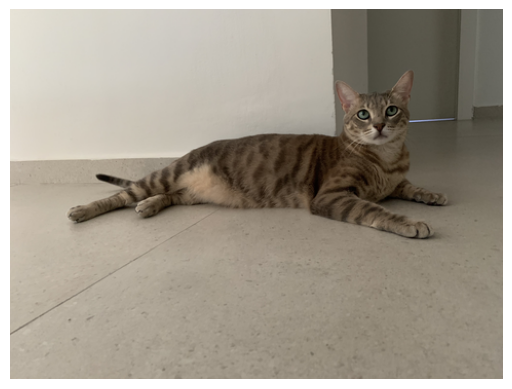

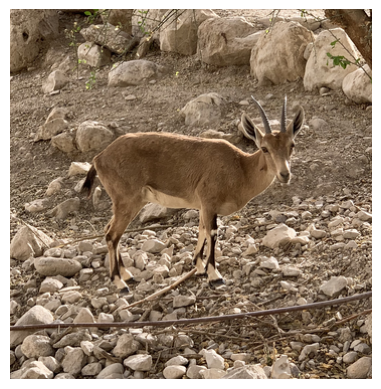

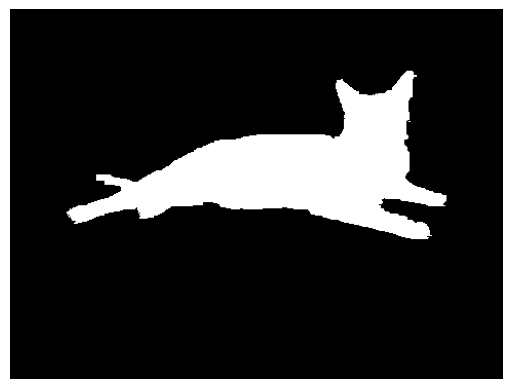

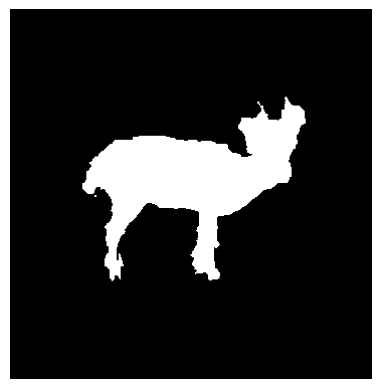

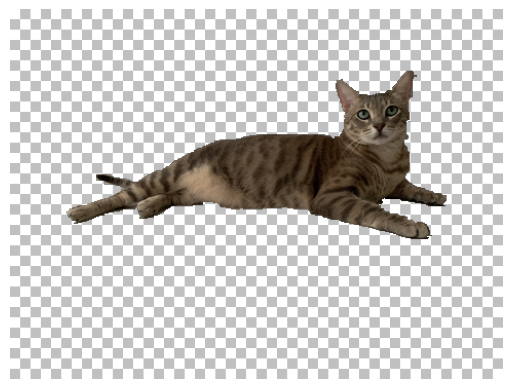

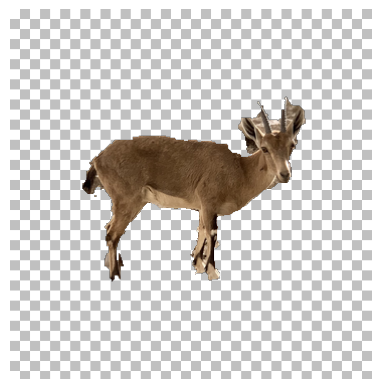

In [7]:
import matplotlib.pyplot as plt
import torch
from cosegmentation import find_cosegmentation, draw_cosegmentation, draw_cosegmentation_binary_masks

with torch.no_grad():

     # computing cosegmentation
    seg_masks, pil_images = find_cosegmentation(images_paths, elbow, load_size, layer, facet, bin, thresh, model_type,
                                                stride, votes_percentage, sample_interval, remove_outliers,
                                                outliers_thresh, low_res_saliency_maps)

    figs, axes = [], []
    for pil_image in pil_images:
      fig, ax = plt.subplots()
      ax.axis('off')
      ax.imshow(pil_image)
      figs.append(fig)
      axes.append(ax)
    
    # saving cosegmentations
    binary_mask_figs = draw_cosegmentation_binary_masks(seg_masks)
    chessboard_bg_figs = draw_cosegmentation(seg_masks, pil_images)

    plt.show()